<h1>🤖 AI ENGINEER TEST WITH WORDCLOUDS 🤖</h1>

<h2>Hi, everyone! My Name is Muhammad Furqon Wahyu Sasongko, you can call me Furqon.</h2>

<h2>in this test i will show you my wordcloud with python using data that i got from web scraping.</h2>

notes: if you wanted to run this notebook, especially to test the input that i create in the last code cell, i recomend you to <a href="https://www.kaggle.com/datasets/aashita/masks">donwload the mask</a>, especially the comment.png and put the png file into this runtime folder.

<h1>INSTALLING NECESSARY UNAVAILABLE LIBRARY</h1>

In [64]:
# !pip install beautifulsoup4
# !pip install wordcloud

<h1>IMPORTING NECESSARY LIBRARY</h1>

In [65]:
from bs4 import BeautifulSoup #used to scrape data and parsing html from website
import urllib #used when we working with url links
from wordcloud import WordCloud, STOPWORDS #the main library for making wordclouds, while STOPWORDS is used for removing unnecessary word such as the, is, etc
import numpy as np #used to playing with arrays, in this case converting png into arrays
import matplotlib.pyplot as plt #used to visualize our wordclouds and more
from PIL import Image #used to get image file

<h1>🌐 GETTING THE DATA FROM URL 🌐</h1>

<h3>In this case, i will use data from website below with the theme is presidential election, because in 14th February in Indonesia there will be a huge election from presidential, parlement, senator, etc</h3>

<h3>As you can see there is a headers variable. Sometimes there is a websites that prevents us from scraping the data (like cookies privacy, just like memes in below), so headers is necessary to prevent this kind of problems</h3>

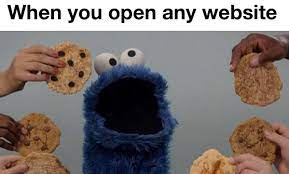

In [66]:
url = "https://carnegieendowment.org/2024/01/17/indonesia-votes-candidates-campaigns-consequences-event-8219" #copying our url into url variable
headers = {'user-agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.3'} #headers

In [67]:
req = urllib.request.Request(url, headers=headers) #requesting access to website with headers
data = urllib.request.urlopen(req).read() #open, read, and insert data from url into data variable

In [68]:
soup = BeautifulSoup(data, "html.parser") #parsing data from the url using BeautifulSoup

In [69]:
main_content = soup.find("div", attrs={"class": "article-body"}) #searching whole main content from article-body

In [70]:
#listing all readable content into str variable from main_content

str = ""
for list in main_content:
  info = list.text
  str+=info

In [71]:
#printing str to verify that the content is successfully extracted from website
str

'\nOn February 14, 2024, over 200 million registered Indonesian voters will have the opportunity to vote in the country’s general election. With new leadership at stake, three presidential and vice-presidential pairs are vying for the country’s highest offices: Anies Baswedan and Muhaimin Iskandar, Ganjar Pranowo and Mahfud MD, and Prabowo Subianto and Gibran Rakabuming Raka.\xa0\nWhat do these candidates and their platforms mean for Indonesia’s democratic trajectory, political stability, and economic future? Will President Joko Widodo’s mega-plans such as the new capital, Nusantara, falter or advance under the next administration? How will Southeast Asia’s largest nation balance industrial growth, sustainability, and social equity? What will Jakarta’s—or Nusantara’s—foreign policy look like as strategic tensions simmer in the region and globally?\xa0\xa0\nJoin Carnegie’s Asia Program for a timely discussion on Indonesia’s upcoming elections with Sana Jaffrey, Mega Valentina, Philips V

<h1>☁ CREATING AND VISUALIZE WORDCLOUDS ☁</h1>

In [72]:
STOPWORDS.update(["see","common","will","next","think"]) #updating already existing STOPWORDS so that only important words are used

In [73]:
mask = np.array(Image.open("/content/comment.png")) #importing mask to shape the wordcloud looks better

In [74]:
#creating wordcloud
wordcloud = WordCloud(mask = mask,max_words=400,stopwords=STOPWORDS, background_color='white', width=4000, height=2000, random_state=42).generate(str)

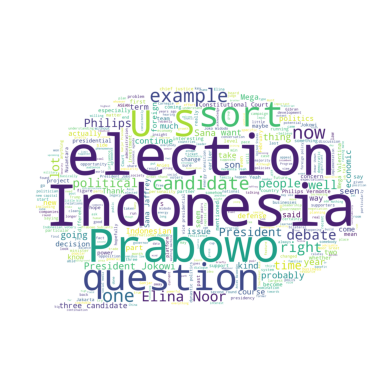

In [75]:
#visualize wordcloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
#making punctuations word for better selection of counting words
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
uninteresting_word = STOPWORDS #make sure that stopwords is used to remove uninteresting words

In [77]:
word_count_dict = {} #creating dictionary for word count
file_content_words = str.lower().split(" ") #transform all words into lower (example: AHA into aha)
#creating loop to count every words
for word in file_content_words:
  for punctuation in punctuations: #removing all punctuations to clean the words
    word = word.replace(punctuation, "")
    if word.isalpha() and word not in uninteresting_word: #cheking if the word is fully alphabetical or mix from alphabet and numeric, and also checking if the word is important or not
      if word not in word_count_dict: #dont count any word that not inserted into dictionary (for example uninteresting words or mix alphabet and numeric words)
        word_count_dict[word] = 0
      if word in word_count_dict: #add 1 into count if the word is in word_count_dict
        word_count_dict[word] += 1

print("\n\nWORD COUNT \n")
print(word_count_dict) #showing the dictionary, reminder: the dictionary is not sorted yet



WORD COUNT 

{'february': 164, 'million': 28, 'registered': 56, 'indonesian': 420, 'voters': 223, 'opportunity': 140, 'vote': 28, 'general': 112, 'election': 463, 'new': 392, 'leadership': 78, 'stake': 43, 'three': 603, 'presidential': 392, 'vicepresidential': 25, 'pairs': 101, 'vying': 28, 'highest': 56, 'offices': 19, 'anies': 211, 'baswedan': 58, 'muhaimin': 56, 'iskandar': 30, 'ganjar': 183, 'pranowo': 71, 'mahfud': 56, 'md': 30, 'prabowo': 716, 'subianto': 68, 'gibran': 112, 'rakabuming': 43, 'candidates': 502, 'platforms': 56, 'mean': 129, 'democratic': 140, 'trajectory': 15, 'political': 547, 'stability': 43, 'economic': 448, 'future': 103, 'president': 1052, 'joko': 140, 'megaplans': 25, 'capital': 211, 'nusantara': 128, 'falter': 28, 'advance': 28, 'administration': 68, 'southeast': 84, 'largest': 140, 'nation': 28, 'balance': 84, 'industrial': 28, 'growth': 58, 'sustainability': 43, 'social': 168, 'equity': 10, 'policy': 96, 'look': 140, 'strategic': 56, 'tensions': 28, 'si

In [78]:
word_count_dict.items() #checking that word_count_dict process is success

dict_items([('february', 164), ('million', 28), ('registered', 56), ('indonesian', 420), ('voters', 223), ('opportunity', 140), ('vote', 28), ('general', 112), ('election', 463), ('new', 392), ('leadership', 78), ('stake', 43), ('three', 603), ('presidential', 392), ('vicepresidential', 25), ('pairs', 101), ('vying', 28), ('highest', 56), ('offices', 19), ('anies', 211), ('baswedan', 58), ('muhaimin', 56), ('iskandar', 30), ('ganjar', 183), ('pranowo', 71), ('mahfud', 56), ('md', 30), ('prabowo', 716), ('subianto', 68), ('gibran', 112), ('rakabuming', 43), ('candidates', 502), ('platforms', 56), ('mean', 129), ('democratic', 140), ('trajectory', 15), ('political', 547), ('stability', 43), ('economic', 448), ('future', 103), ('president', 1052), ('joko', 140), ('megaplans', 25), ('capital', 211), ('nusantara', 128), ('falter', 28), ('advance', 28), ('administration', 68), ('southeast', 84), ('largest', 140), ('nation', 28), ('balance', 84), ('industrial', 28), ('growth', 58), ('sustaina

How much word do you want to see as most appeared words?3
The top 3 value pairs are  {'president': 1052, 'indonesia': 734, 'prabowo': 716}


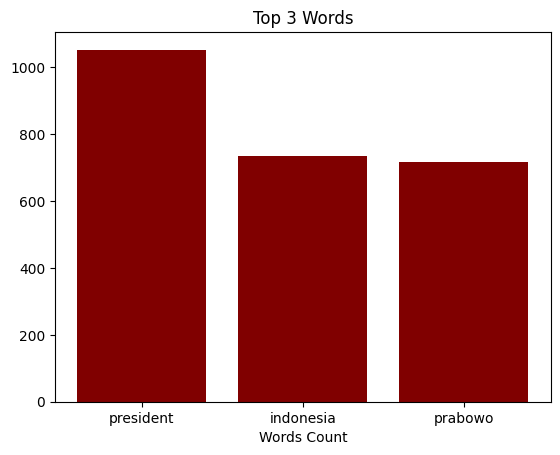

In [80]:
from operator import itemgetter #helping us sort the data, either low to high or high to low
n = input("How much word do you want to see as most appeared words?") #accepting input of how much word do you want to show

N = int(n) #converting string input into integer

res = dict(sorted(word_count_dict.items(), key=itemgetter(1), reverse=True)[:N]) #sorting the data from high to low

print("The top {} value pairs are ".format(N), res) #showing the data as dict

#inputing keys and values from res variable into reskeys and resvalues for easier visualization
reskeys = res.keys()
resvalues = res.values()

#visualize the top words using barplot
plt.bar(reskeys, resvalues, color='maroon')
plt.title("Top {} Words".format(N))
plt.xlabel("Words")
plt.xlabel("Words Count")
plt.show()